## Lung Cancer Prediction 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Read Data 

In [2]:
df = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


## Clean Data 

In [3]:
df.duplicated().sum()

33

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Explore Data 

In [8]:
df['AGE'].describe()

count    276.000000
mean      62.909420
std        8.379355
min       21.000000
25%       57.750000
50%       62.500000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

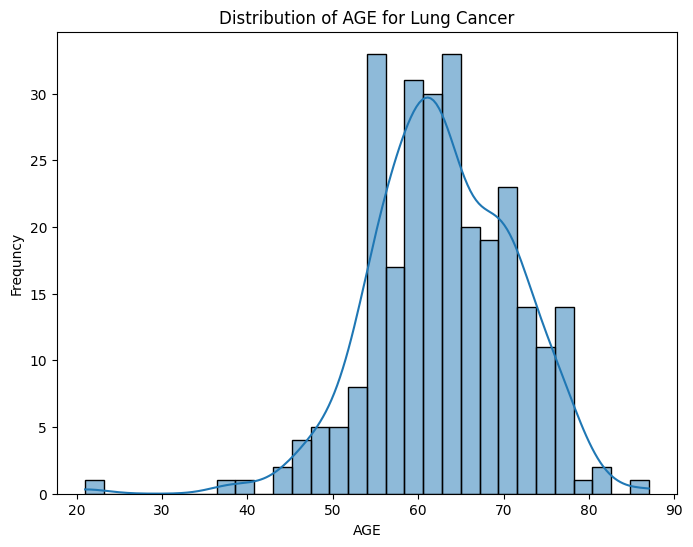

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['AGE'],bins=30,kde=True)
plt.title('Distribution of AGE for Lung Cancer')
plt.xlabel('AGE')
plt.ylabel('Frequncy')
plt.show()

In [10]:
count_Gender= df['GENDER'].value_counts()
count_Gender

GENDER
M    142
F    134
Name: count, dtype: int64

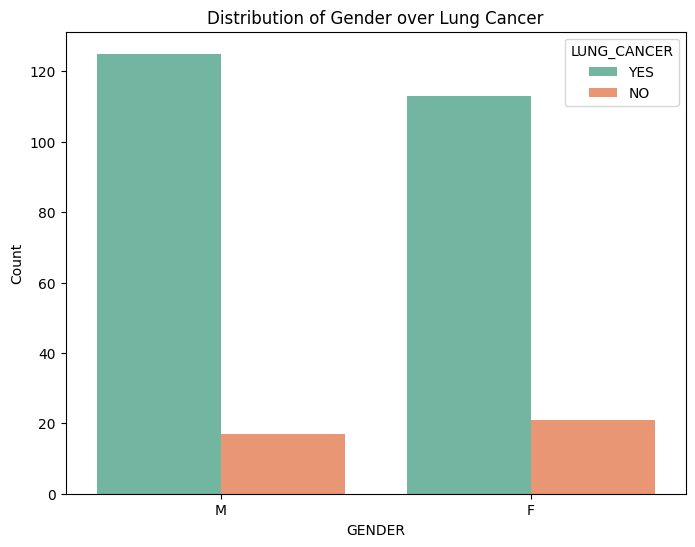

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'GENDER',hue='LUNG_CANCER',data = df,palette="Set2")
plt.title('Distribution of Gender over Lung Cancer')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.show()

In [12]:
df2 = df.replace({2:"YES",1:'NO'})


In [13]:
df.columns = df.columns.str.strip()

In [14]:
df2.columns = df2.columns.str.strip()

In [15]:
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


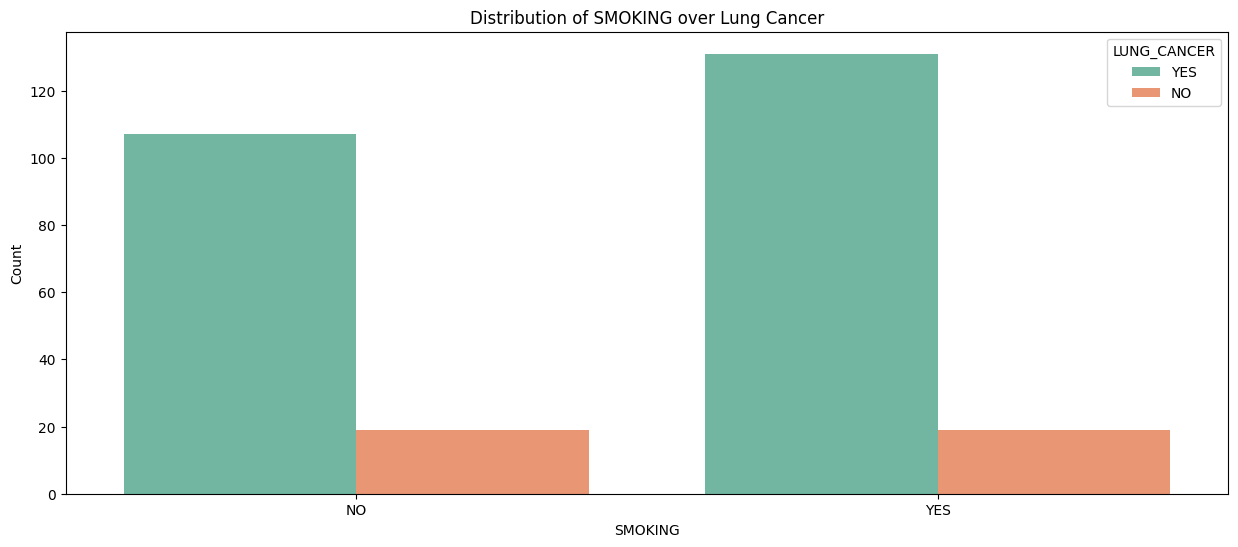

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'SMOKING',hue='LUNG_CANCER',data = df2,palette="Set2")
plt.title('Distribution of SMOKING over Lung Cancer')
plt.xlabel('SMOKING')
plt.ylabel('Count')
plt.show()

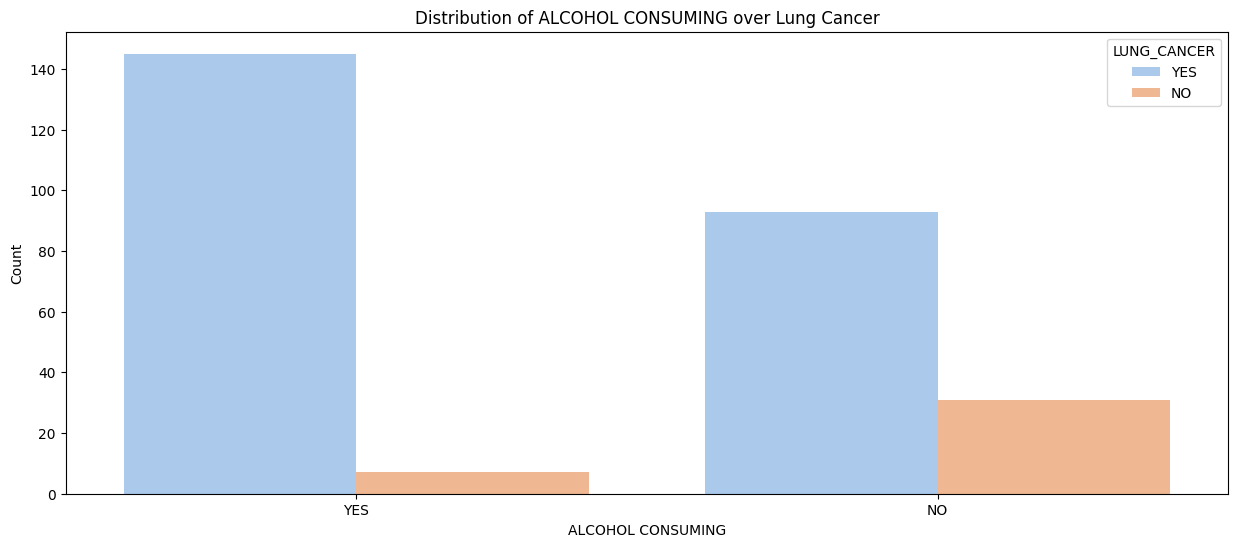

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'ALCOHOL CONSUMING',hue='LUNG_CANCER',data = df2,palette="pastel")
plt.title('Distribution of ALCOHOL CONSUMING over Lung Cancer')
plt.xlabel('ALCOHOL CONSUMING')
plt.ylabel('Count')
plt.show()


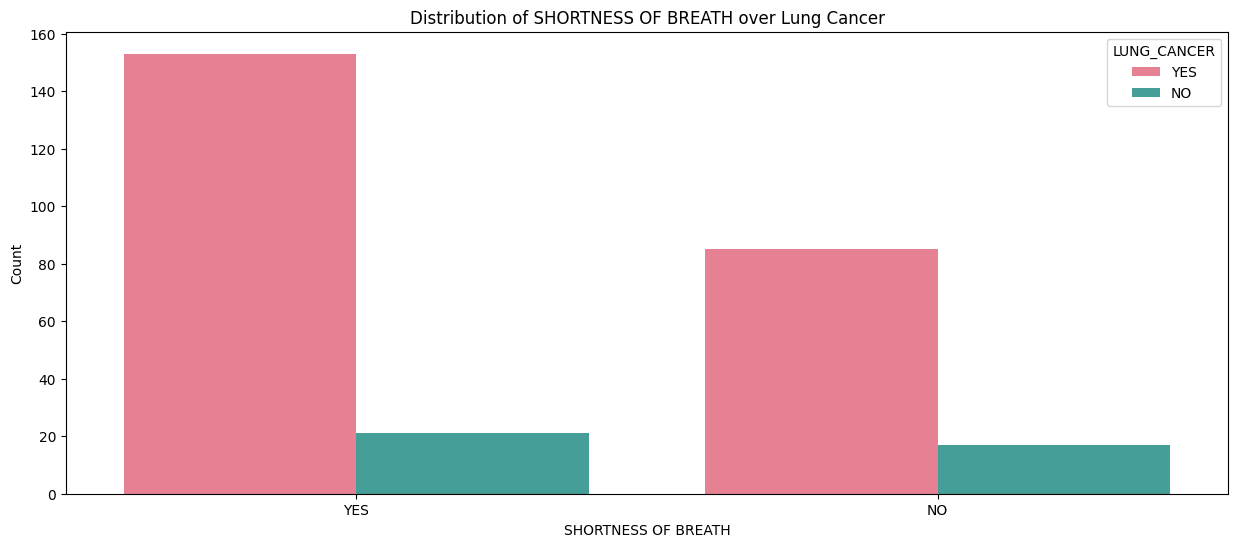

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'SHORTNESS OF BREATH',hue='LUNG_CANCER',data = df2,palette="husl")
plt.title('Distribution of SHORTNESS OF BREATH over Lung Cancer')
plt.xlabel('SHORTNESS OF BREATH')
plt.ylabel('Count')
plt.show()


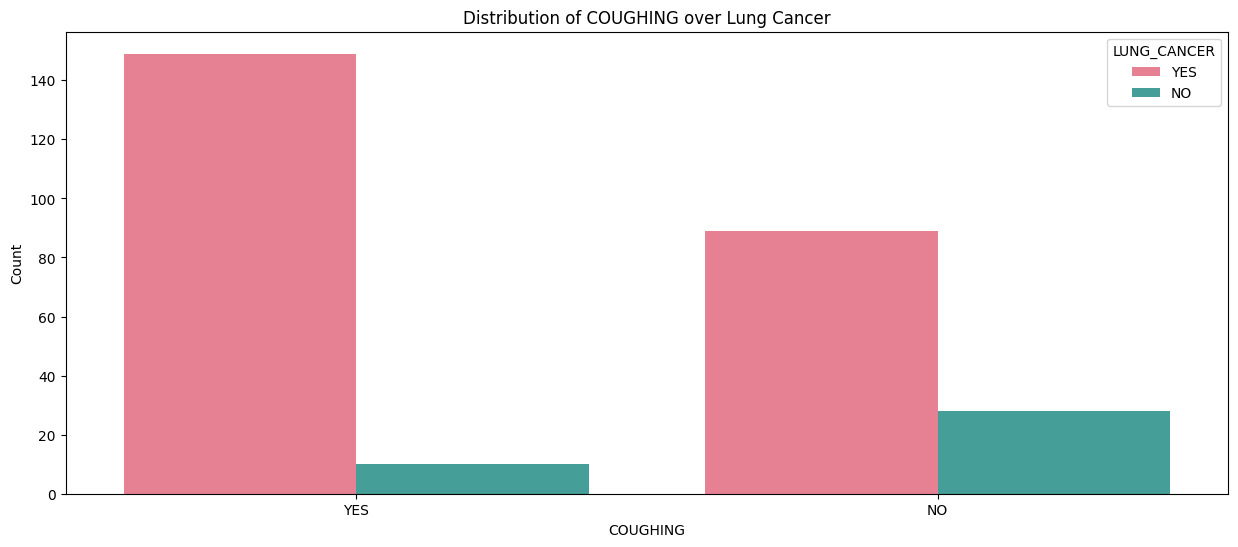

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'COUGHING',hue='LUNG_CANCER',data = df2,palette="husl")
plt.title('Distribution of COUGHING over Lung Cancer')
plt.xlabel('COUGHING')
plt.ylabel('Count')
plt.show()


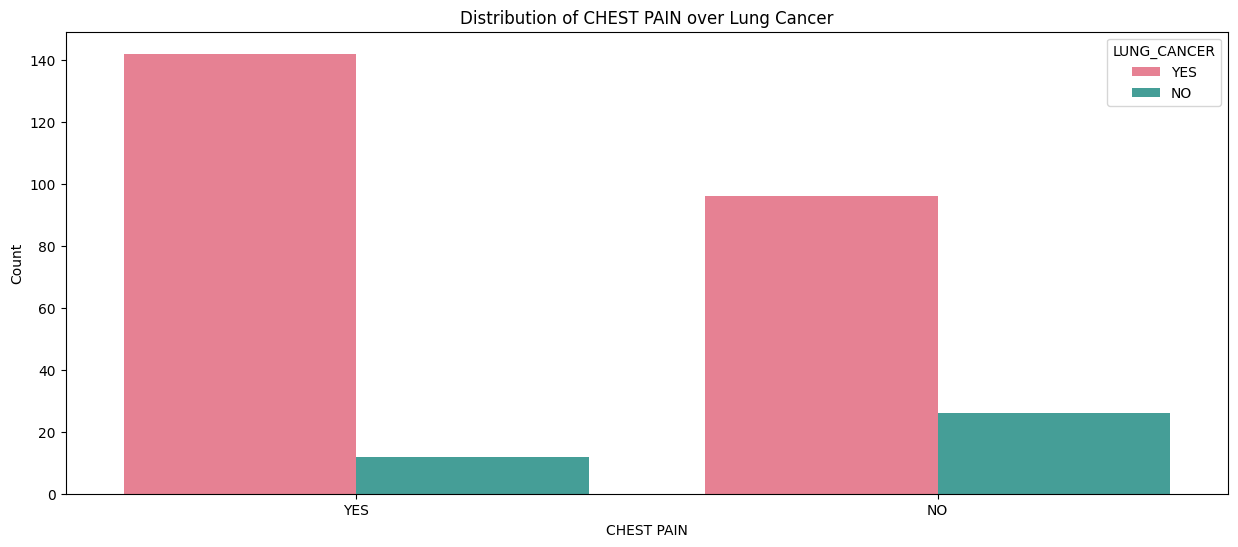

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'CHEST PAIN',hue='LUNG_CANCER',data = df2,palette="husl")
plt.title('Distribution of CHEST PAIN over Lung Cancer')
plt.xlabel('CHEST PAIN')
plt.ylabel('Count')
plt.show()

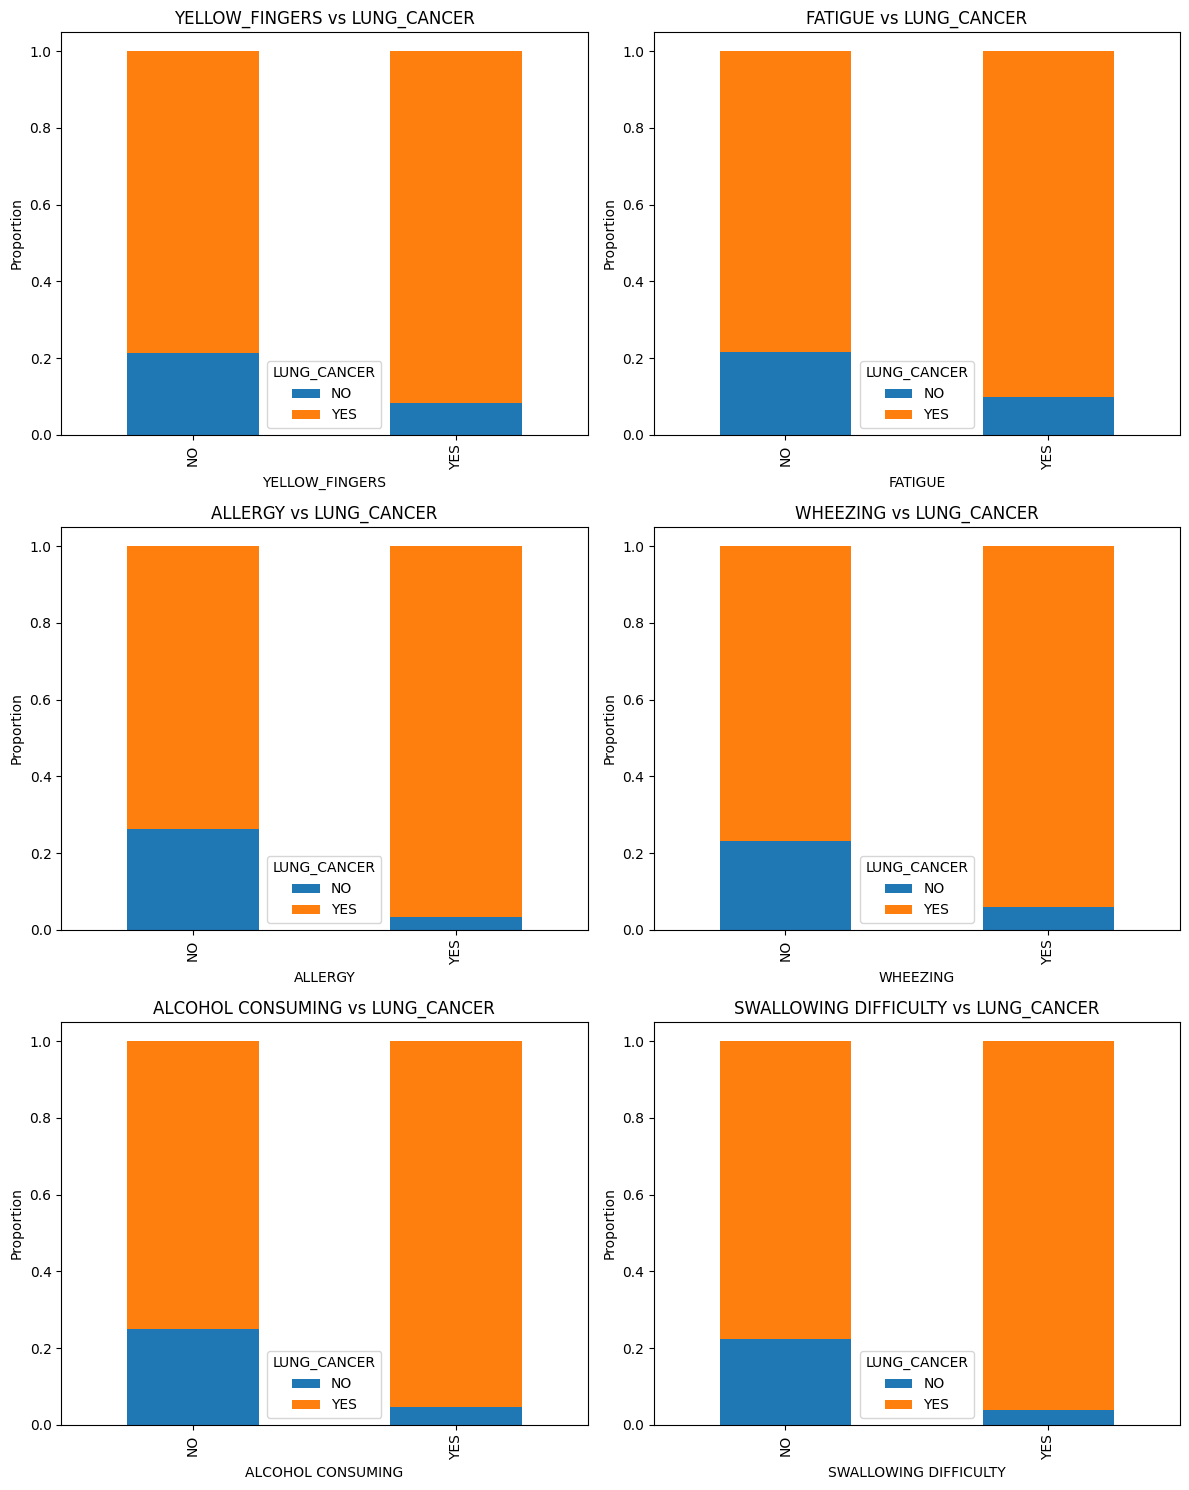

In [21]:
def stacked_bar(data, feature, target, ax):
    crosstab = pd.crosstab(data[feature], data[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{feature} vs {target}')
    ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plot each feature
stacked_bar(df2, 'YELLOW_FINGERS', 'LUNG_CANCER', axes[0, 0])
stacked_bar(df2, 'FATIGUE', 'LUNG_CANCER', axes[0, 1])
stacked_bar(df2, 'ALLERGY', 'LUNG_CANCER', axes[1, 0])
stacked_bar(df2, 'WHEEZING', 'LUNG_CANCER', axes[1, 1])
stacked_bar(df2, 'ALCOHOL CONSUMING', 'LUNG_CANCER', axes[2, 0])
stacked_bar(df2, 'SWALLOWING DIFFICULTY', 'LUNG_CANCER', axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

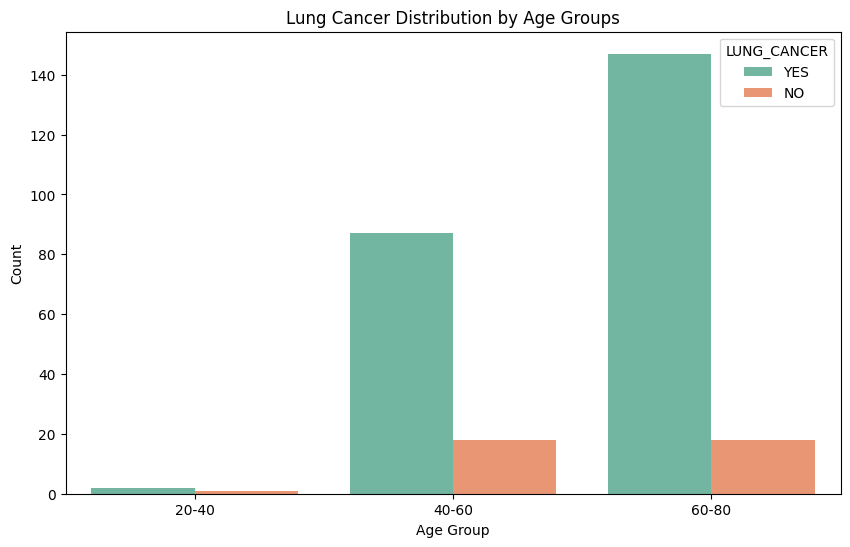

In [22]:

df2['AGE_BIN'] = pd.cut(df2['AGE'], bins=[20, 40, 60, 80], labels=['20-40', '40-60', '60-80'])
plt.figure(figsize=(10,6))
sns.countplot(x='AGE_BIN', hue='LUNG_CANCER', data=df2, palette="Set2")
plt.title('Lung Cancer Distribution by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [23]:
df['GENDER'] = df['GENDER'].replace({'M':1,'F':2})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':1,"NO":2})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


In [25]:
count_patient = df["LUNG_CANCER"].value_counts()
count_patient

LUNG_CANCER
1    238
2     38
Name: count, dtype: int64

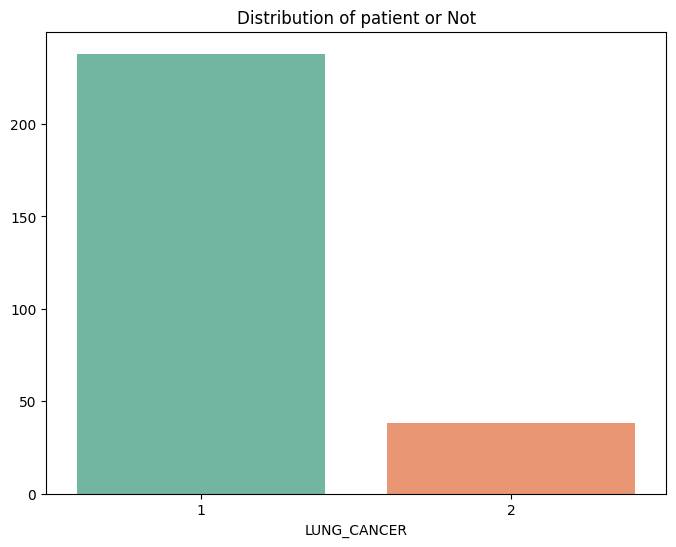

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x=count_patient.index,y=count_patient.values,palette='Set2')
plt.title('Distribution of patient or Not')
plt.show()

In [27]:
df.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.013120,-0.041131,0.202506,0.152032,0.261427,0.189925,0.079020,-0.150174,-0.121047,-0.434264,-0.120228,0.052893,0.048959,-0.361547,0.053666
AGE,0.013120,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,-0.106305
SMOKING,-0.041131,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,-0.034878
YELLOW_FINGERS,0.202506,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,-0.189192
ANXIETY,0.152032,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,-0.144322
PEER_PRESSURE,0.261427,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,-0.195086
CHRONIC DISEASE,0.189925,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,-0.143692
FATIGUE,0.079020,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,-0.160078
ALLERGY,-0.150174,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,-0.333552
WHEEZING,-0.121047,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,-0.249054


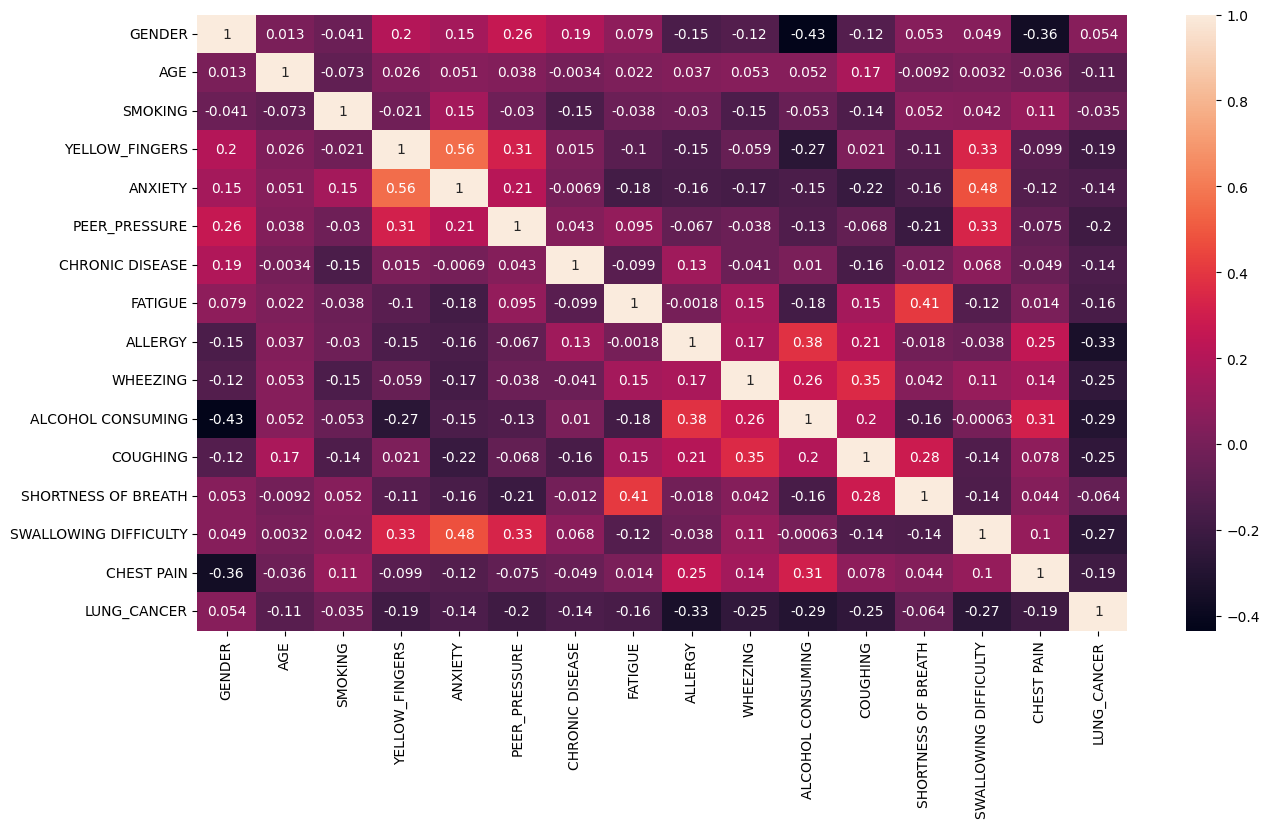

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()